<strong>Objective:</strong> To train a Random Forest Model on a dataset to counter check performance of a Logistic Regression model on the same

### Importing data

In [1]:
#listing important packages needed 

required.packages <- required.packages <- c("RODBC", "tidyverse", "randomForest", "ggcorrplot", "caret", "mltools", "data.table", "pROC", "cenROC")

In [2]:
#verify if all above packages are contained in the list of installed packages for our R environment
missing.packages <- required.packages[!(required.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)>0) install.packages(missing.packages, dependencies = TRUE)
#loading packages
sapply(required.packages, require, character.only = TRUE)

Loading required package: RODBC

Loading required package: tidyverse

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: randomForest

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin


Loading required package: ggcorrplot

Loading required package: caret

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'pac

RODBC    tidyverse randomForest   ggcorrplot        caret      mltools 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE 
  data.table         pROC       cenROC 
        TRUE         TRUE         TRUE

In [3]:
data <- read.csv('../file_2.csv')

In [4]:
head(data,3)

,ï..tenure.month,loan.fee,loan,mobile.transactions,mobile.transactions.value,mobile.services,app.users,TOTAL_INFLOW,SALARY_STATUS,TOTAL_OUTFLOW,age,gender,is_default
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,5,4.7,10680,0,0,0,0,0,0,0,25,M,Y
2,21,9.6,9120,13,2922000,3,0,3000000,0,2994764,36,M,N
3,28,10.9,57900,0,0,0,0,0,0,502900,25,M,Y


### Tidying Up our data

In [5]:
names(data) <- toupper(names(data))

In [6]:
names(data)[names(data)=='Ï..TENURE.MONTH'] <- c('TENURE.MONTH')

In [7]:
head(data,3)

,TENURE.MONTH,LOAN.FEE,LOAN,MOBILE.TRANSACTIONS,MOBILE.TRANSACTIONS.VALUE,MOBILE.SERVICES,APP.USERS,TOTAL_INFLOW,SALARY_STATUS,TOTAL_OUTFLOW,AGE,GENDER,IS_DEFAULT
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,5,4.7,10680,0,0,0,0,0,0,0,25,M,Y
2,21,9.6,9120,13,2922000,3,0,3000000,0,2994764,36,M,N
3,28,10.9,57900,0,0,0,0,0,0,502900,25,M,Y


In [8]:
names(data) <- gsub('\\.', '_', names(data))

In [9]:
table(data$IS_DEFAULT)


   N    Y 
5391 5619 

In [10]:
head(data,3)

,TENURE_MONTH,LOAN_FEE,LOAN,MOBILE_TRANSACTIONS,MOBILE_TRANSACTIONS_VALUE,MOBILE_SERVICES,APP_USERS,TOTAL_INFLOW,SALARY_STATUS,TOTAL_OUTFLOW,AGE,GENDER,IS_DEFAULT
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,5,4.7,10680,0,0,0,0,0,0,0,25,M,Y
2,21,9.6,9120,13,2922000,3,0,3000000,0,2994764,36,M,N
3,28,10.9,57900,0,0,0,0,0,0,502900,25,M,Y


In [11]:
# checking features stored types
str(data)

'data.frame':	11010 obs. of  13 variables:
 $ TENURE_MONTH             : int  5 21 28 2 21 28 14 14 21 14 ...
 $ LOAN_FEE                 : num  4.7 9.6 10.9 4.7 9.6 10.9 7.8 7.8 9.6 7.8 ...
 $ LOAN                     : num  10680 9120 57900 1090 71250 ...
 $ MOBILE_TRANSACTIONS      : int  0 13 0 0 34 0 4 113 25 12 ...
 $ MOBILE_TRANSACTIONS_VALUE: num  0 2922000 0 0 502000 ...
 $ MOBILE_SERVICES          : int  0 3 0 0 6 0 1 9 2 4 ...
 $ APP_USERS                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TOTAL_INFLOW             : int  0 3000000 0 281400 1548399 353597 836622 14250000 1921850 24384 ...
 $ SALARY_STATUS            : int  0 0 0 1 1 1 0 0 1 0 ...
 $ TOTAL_OUTFLOW            : int  0 2994764 502900 148931 1265621 351355 662400 16374108 1675230 189341 ...
 $ AGE                      : int  25 36 25 32 32 35 25 33 46 23 ...
 $ GENDER                   : chr  "M" "M" "M" "F" ...
 $ IS_DEFAULT               : chr  "Y" "N" "Y" "Y" ...


### Encoding and Casting Types

In [12]:
# feature encoding (encoding to either 0 or 1 as integer - boolean would also be fine)

encoder <- function(x){
    if (x %in% c("M","Y")){
        x <- 1L
    } else {
        x <- 0L
    }
}

In [13]:
data$GENDER <- sapply(data$GENDER, encoder)

In [14]:
data$IS_DEFAULT <- sapply(data$IS_DEFAULT, encoder)

In [15]:
data$TOTAL_INFLOW <- as.numeric(data$TOTAL_INFLOW)
data$TOTAL_OUTFLOW <- as.numeric(data$TOTAL_OUTFLOW)

In [16]:
# Now we are working with only integer and numeric
str(data)

'data.frame':	11010 obs. of  13 variables:
 $ TENURE_MONTH             : int  5 21 28 2 21 28 14 14 21 14 ...
 $ LOAN_FEE                 : num  4.7 9.6 10.9 4.7 9.6 10.9 7.8 7.8 9.6 7.8 ...
 $ LOAN                     : num  10680 9120 57900 1090 71250 ...
 $ MOBILE_TRANSACTIONS      : int  0 13 0 0 34 0 4 113 25 12 ...
 $ MOBILE_TRANSACTIONS_VALUE: num  0 2922000 0 0 502000 ...
 $ MOBILE_SERVICES          : int  0 3 0 0 6 0 1 9 2 4 ...
 $ APP_USERS                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TOTAL_INFLOW             : num  0 3000000 0 281400 1548399 ...
 $ SALARY_STATUS            : int  0 0 0 1 1 1 0 0 1 0 ...
 $ TOTAL_OUTFLOW            : num  0 2994764 502900 148931 1265621 ...
 $ AGE                      : int  25 36 25 32 32 35 25 33 46 23 ...
 $ GENDER                   : int  1 1 1 0 0 1 1 1 1 1 ...
 $ IS_DEFAULT               : int  1 0 1 1 0 0 1 0 0 1 ...


In [17]:
# Check for NAs

sum(is.na(data)) # there are no nas

[1] 0

In [18]:
head(data,3)

,TENURE_MONTH,LOAN_FEE,LOAN,MOBILE_TRANSACTIONS,MOBILE_TRANSACTIONS_VALUE,MOBILE_SERVICES,APP_USERS,TOTAL_INFLOW,SALARY_STATUS,TOTAL_OUTFLOW,AGE,GENDER,IS_DEFAULT
,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,5,4.7,10680,0,0,0,0,0e+00,0,0,25,1,1
2,21,9.6,9120,13,2922000,3,0,3e+06,0,2994764,36,1,0
3,28,10.9,57900,0,0,0,0,0e+00,0,502900,25,1,1


In [19]:
# Data is now clean let's check some EDA

summary(data)

  TENURE_MONTH      LOAN_FEE           LOAN          MOBILE_TRANSACTIONS
 Min.   : 0.00   Min.   : 2.100   Min.   :     4.4   Min.   :  0.00     
 1st Qu.: 5.00   1st Qu.: 4.700   1st Qu.: 11140.0   1st Qu.:  3.00     
 Median :21.00   Median : 9.600   Median : 22800.0   Median :  8.00     
 Mean   :15.73   Mean   : 8.025   Mean   : 37849.7   Mean   : 14.41     
 3rd Qu.:21.00   3rd Qu.: 9.600   3rd Qu.: 57900.0   3rd Qu.: 17.00     
 Max.   :28.00   Max.   :10.900   Max.   :478950.0   Max.   :304.00     
 MOBILE_TRANSACTIONS_VALUE MOBILE_SERVICES    APP_USERS     
 Min.   :       0          Min.   : 0.000   Min.   :0.0000  
 1st Qu.:    3000          1st Qu.: 1.000   1st Qu.:0.0000  
 Median :   50000          Median : 3.000   Median :0.0000  
 Mean   :  581946          Mean   : 2.803   Mean   :0.1734  
 3rd Qu.:  341000          3rd Qu.: 4.000   3rd Qu.:0.0000  
 Max.   :50864000          Max.   :12.000   Max.   :1.0000  
  TOTAL_INFLOW       SALARY_STATUS    TOTAL_OUTFLOW           

In [20]:
# Number of records available
nrow(data)

[1] 11010

In [21]:
# Number of features in the records
ncol(data)

[1] 13

In [22]:
# Exploring the outcome variable. The split is good.
table(data$IS_DEFAULT)


   0    1 
5391 5619 

### Preparing Train and Test Data

In [23]:
data$IS_DEFAULT <- as.factor(data$IS_DEFAULT)

In [24]:
set.seed(300)
trainIndex <- createDataPartition(data$IS_DEFAULT, p = 0.8, list = FALSE, times = 1)

In [25]:
train <- data[trainIndex,]
test <- data[-trainIndex,]

In [26]:
# Verifying distribution for Train
prop.table(table(train$IS_DEFAULT))


        0         1 
0.4896129 0.5103871 

In [27]:
# Verifying distribution for Test
prop.table(table(test$IS_DEFAULT))


        0         1 
0.4897774 0.5102226 

### Fitting The Model

In [28]:
# Fitting our data using Random Forest
rf.model <- randomForest(IS_DEFAULT~., data = train, ntree=600, importance = T, mtry = sqrt(ncol(train)), na.action = na.omit)
rf.model


Call:
 randomForest(formula = IS_DEFAULT ~ ., data = train, ntree = 600,      importance = T, mtry = sqrt(ncol(train)), na.action = na.omit) 
               Type of random forest: classification
                     Number of trees: 600
No. of variables tried at each split: 4

        OOB estimate of  error rate: 48.54%
Confusion matrix:
     0    1 class.error
0 2050 2263   0.5246928
1 2013 2483   0.4477313

In [29]:
# Accuracy check using test data

y_pred_test <- predict(rf.model, newdata = test)

conf_test <- confusionMatrix(test$IS_DEFAULT, y_pred_test, positive = "1")

conf_test

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 492 586
         1 528 595
                                         
               Accuracy : 0.4939         
                 95% CI : (0.4728, 0.515)
    No Information Rate : 0.5366         
    P-Value [Acc > NIR] : 0.99997        
                                         
                  Kappa : -0.0138        
                                         
 Mcnemar's Test P-Value : 0.08768        
                                         
            Sensitivity : 0.5038         
            Specificity : 0.4824         
         Pos Pred Value : 0.5298         
         Neg Pred Value : 0.4564         
             Prevalence : 0.5366         
         Detection Rate : 0.2703         
   Detection Prevalence : 0.5102         
      Balanced Accuracy : 0.4931         
                                         
       'Positive' Class : 1              
                                         

#### Feature Importance

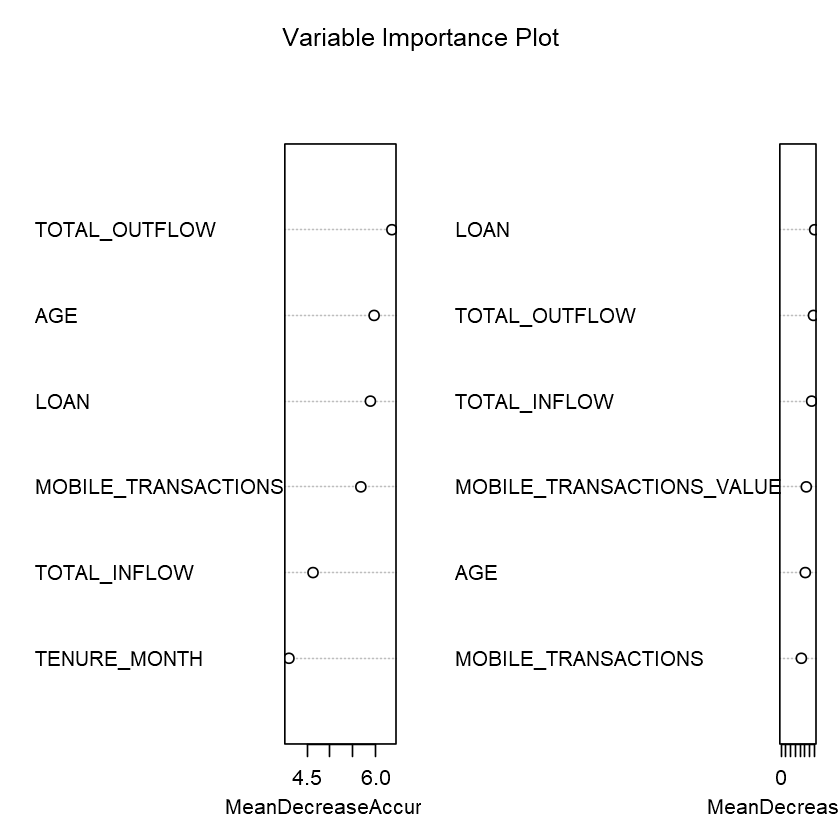

In [30]:
varImpPlot(rf.model , sort = TRUE , n.var=6 , main = "Variable Importance Plot" )

### Model Accuracy

Setting levels: control = 0, case = 1

Setting direction: controls > cases

Setting levels: control = 0, case = 1

Setting direction: controls > cases



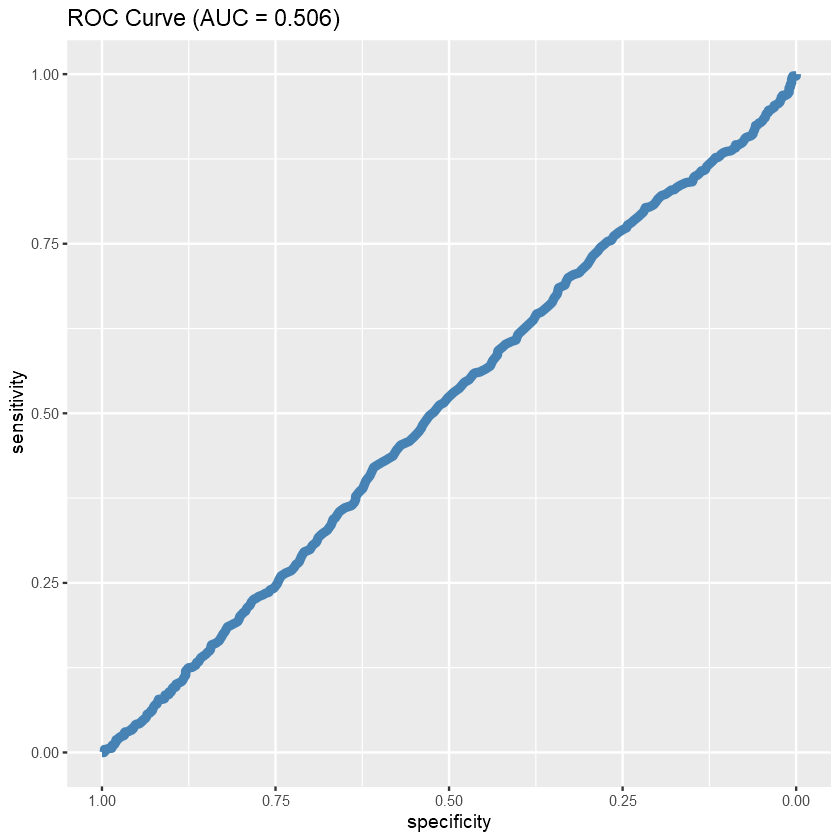

In [31]:
pred_prob_test  <- predict(rf.model, type = "prob", newdata =  test)

auc <-auc(test$IS_DEFAULT, pred_prob_test[,2])
rocobj  <- roc(test$IS_DEFAULT, pred_prob_test[,2])


ggroc(rocobj, colour = 'steelblue', size = 2) +
  ggtitle(paste0('ROC Curve ', '(AUC = ', round(auc,3), ')'))